In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image

In [5]:
train_path= 'C:/Users/meetp/Downloads/fracture_dataset/train'
test_path= 'C:/Users/meetp/Downloads/fracture_dataset/test'

In [6]:
train_data= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
test_data= image.ImageDataGenerator(    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [7]:
train_generator = train_data.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 4,
    class_mode = 'binary')
validation_generator = test_data.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 4,
    shuffle=True,
    class_mode = 'binary')

Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [8]:
base_model = tf.keras.applications.EfficientNetB3(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ ?                           │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise (GaussianNoise)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_1 (GaussianNoise)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,783,535 (41.14 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 10,783,535 (41.14 MB)

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','Precision','Recall','AUC'])

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

lrp = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=2)
filepath = 'best_model.keras'  # Change filepath extension to .keras
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks = [checkpoint, lrp]

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    steps_per_epoch=5,
    callbacks=callbacks
)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - AUC: 0.3734 - Precision: 0.6750 - Recall: 0.6514 - accuracy: 0.5742 - loss: 2.0475 
Epoch 1: val_accuracy improved from -inf to 0.58333, saving model to best_model.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 46s 11s/step - AUC: 0.4028 - Precision: 0.6837 - Recall: 0.6454 - accuracy: 0.5785 - loss: 1.9731 - val_AUC: 0.5404 - val_Precision: 0.4896 - val_Recall: 0.9833 - val_accuracy: 0.5833 - val_loss: 0.9678 - learning_rate: 1.0000e-05
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - AUC: 0.3401 - Precision: 0.1571 - Recall: 0.2217 - accuracy: 0.4733 - loss: 1.9935         
Epoch 2: val_accuracy did not improve from 0.58333
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 11s/step - AUC: 0.3581 - Precision: 0.1865 - Recall: 0.2472 - accuracy: 0.4694 - loss: 1.9408 - val_AUC: 0.5629 - val_Precision: 0.4822 - val_Recall: 0.9583 - val_accuracy: 0.5717 - val_loss: 0.9418 - learning_rate: 1.0000e-05
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - AUC: 0.3731 - Precisio

In [15]:
model.evaluate(train_generator)

2216/2216 ━━━━━━━━━━━━━━━━━━━━ 627s 283ms/step - AUC: 0.6294 - Precision: 0.5703 - Recall: 0.7172 - accuracy: 0.5870 - loss: 0.7440


[0.7530564665794373,
 0.6231626868247986,
 0.5598995685577393,
 0.7122974991798401,
 0.5808417201042175]

In [16]:
model.evaluate(validation_generator)

150/150 ━━━━━━━━━━━━━━━━━━━━ 41s 273ms/step - AUC: 0.6017 - Precision: 0.4710 - Recall: 0.9402 - accuracy: 0.5763 - loss: 0.8850


[0.9240010380744934,
 0.5647221803665161,
 0.48619958758354187,
 0.9541666507720947,
 0.57833331823349]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
[[0.7304243]]
THE UPLOADED X-RAY IMAGE IS: Normal


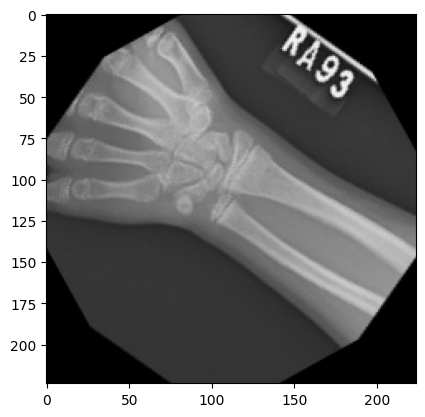

In [34]:
from tensorflow.keras.utils import load_img, img_to_array
img = load_img("C:/Users/meetp/Desktop/data/f1 (5).jpg",target_size=(224,224))
imag = img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a<0.5:
      op="Fracture"   
else:
      op="Normal"
plt.imshow(img)
print("THE UPLOADED X-RAY IMAGE IS: "+str(op))